  ### ------------------------Start of Assignment------------------------------
  #### Title:Module 2 / Week 7: Random Forest
  <li> DATA SCIENCE  Random Forest
  <li> Name:RAJESH ASHOK JAISWAL UIN:669012329
  <li> DATED:10/09/2016
  ### ----------------------------------------------------------------------------

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Now create local data frame 'data' to our manipulation
data=pd.read_csv('RedditShortDemoSurvey.csv')

In [3]:
data

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


### -------------------------------- Data Cleaning and making it Usable-----------------------
<li> Will Rename Column Name to short Name
<li> EDA
<li> Handling Missing Values

## ---------------------------------------------------------------------------------------

In [4]:
#Will rename column values here
data.rename(columns={'Entry Id':'EntryId'}, inplace=True)
data.rename(columns={'Please indicate your gender.':'Sex'}, inplace=True)
data.rename(columns={'Please select the category that includes your age.':'R_Age'}, inplace=True)
data.rename(columns={'What is your marital status?':'M_Status'}, inplace=True)
data.rename(columns={'What best describes your employment status?':'Service'}, inplace=True)
data.rename(columns={'Are you or have you ever been in military service?':'M_Ser'}, inplace=True)
data.rename(columns={'Do you currently have children under the age of 18 living in your household?':'Chd18'}, inplace=True)
data.rename(columns={'What best describes your level of education?':'Education'}, inplace=True)
data.rename(columns={'Treated country data':'Country'}, inplace=True)
data.rename(columns={'(For U. S. redditors) In which state do you live?':'US_State'}, inplace=True)
data.rename(columns={'Which one of the following ranges includes your total yearly household income before taxes?':'R_Income'}, inplace=True)
data.rename(columns={'treated subreddit data':'Reddit'}, inplace=True)
data.rename(columns={'Are you a dog or a cat person?':'Pet'}, inplace=True)
data.rename(columns={'If you were a cheese, what cheese would you be?':'Cheese'}, inplace=True)
data.rename(columns={'Unnamed: 14':'U_14'}, inplace=True)
data.rename(columns={'Unnamed: 15':'U_15'}, inplace=True)
data.rename(columns={'Unnamed: 16':'U_16'}, inplace=True)
data.rename(columns={'Unnamed: 17':'U_17'}, inplace=True)
data.rename(columns={'Unnamed: 18':'U_18'}, inplace=True)
data.rename(columns={'Unnamed: 19':'U_19'}, inplace=True)

In [5]:
data


,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index([u'EntryId', u'Sex', u'R_Age', u'M_Status', u'Service', u'M_Ser',
       u'Chd18', u'Education', u'Country', u'US_State', u'R_Income', u'Reddit',
       u'Pet', u'Cheese', u'U_14', u'U_15', u'U_16', u'U_17', u'U_18',
       u'U_19'],
      dtype='object')

In [7]:
data.shape

(32754, 20)

In [8]:
data.describe()

,EntryId
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103ec6850>]], dtype=object)

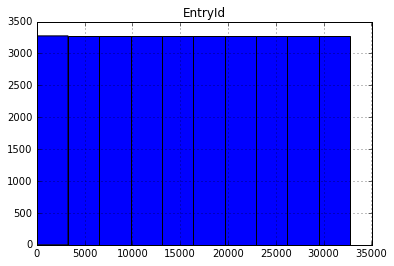

In [9]:
data.hist()

In [10]:
numeric_variables = list(data.dtypes[data.dtypes != "object"].index)
data[numeric_variables].head()

,EntryId
0,1
1,2
2,3
3,4
4,5


In [11]:
categorical_variables = list(data.dtypes[data.dtypes == "object"].index)
data[categorical_variables].head()

,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


## ----------------------------EDA of Whole Data------------------------------
### In this section will clean data and handle missing values.
### Reasign proper value for further handling

## ---------------------EDA of Entry Id(EntryId)-----------------
<li> This is Continous variable:

In [12]:
data.EntryId.describe()

count    32754.000000
mean     16378.561916
std       9456.272427
min          1.000000
25%       8189.250000
50%      16379.500000
75%      24567.750000
max      32756.000000
Name: EntryId, dtype: float64

In [13]:
data.EntryId.value_counts()

2047     1
15693    1
21824    1
23873    1
17730    1
19779    1
30020    1
32069    1
25926    1
27975    1
5448     1
7497     1
1354     1
3403     1
13644    1
9550     1
9518     1
11599    1
21856    1
23905    1
17762    1
19811    1
30052    1
32101    1
25958    1
28007    1
5480     1
7529     1
1386     1
3435     1
        ..
17085    1
19132    1
8849     1
14994    1
12947    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
31386    1
29339    1
19100    1
17053    1
23198    1
21151    1
10928    1
8881     1
15026    1
12979    1
2740     1
693      1
6838     1
4791     1
27320    1
25273    1
31418    1
29371    1
2049     1
Name: EntryId, dtype: int64

In [14]:
data[data.EntryId.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


In [15]:
data.EntryId.shape

(32754,)

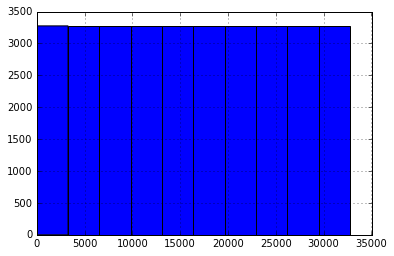

In [16]:
data.EntryId.hist()

### --------------------EDA of Sex--------------------------

In [17]:
data.Sex.value_counts()

Male      26418
Female     6135
None        201
Name: Sex, dtype: int64

In [18]:
#Will Clean Data by handling 'none' value by asigning it to male
data['Sex']=data['Sex'].str.replace('None','Male')

In [19]:
# Categories of Sex column
data.Sex.value_counts()

Male      26619
Female     6135
Name: Sex, dtype: int64

In [20]:
#Will Check is there any null entries
data[data.Sex.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


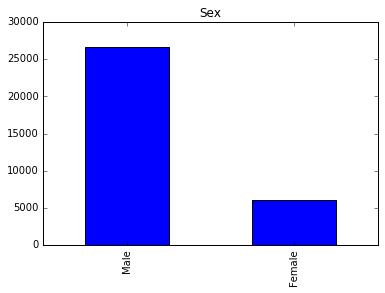

In [21]:
#plot of Sex column
data.Sex.value_counts().plot(kind='bar',title='Sex')

### ----------------------EDA of R_Age--------------------

In [22]:
data.R_Age.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: R_Age, dtype: int64

In [23]:
#In this section we will reasign proper values for range and asign None value in 18-24 column
data['R_Age']=data['R_Age'].str.replace('Under 18','18')
data['R_Age']=data['R_Age'].str.replace('None','24')
data['R_Age']=data['R_Age'].str.replace('18-24','24')
data['R_Age']=data['R_Age'].str.replace('25-34','34')
data['R_Age']=data['R_Age'].str.replace('35-44','44')
data['R_Age']=data['R_Age'].str.replace('45-54','54')
data['R_Age']=data['R_Age'].str.replace('55-64','64')
data['R_Age']=data['R_Age'].str.replace('65 or Above','65')

In [24]:
data.R_Age.value_counts()

24    15890
34    11575
18     2330
44     2257
54      502
64      140
65       60
Name: R_Age, dtype: int64

In [25]:
##Will Check Missing Value
data[data.R_Age.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


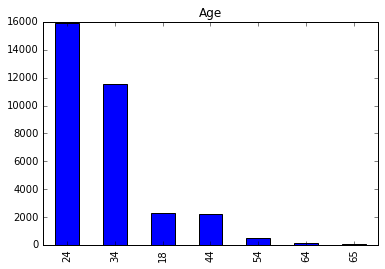

In [26]:
data.R_Age.value_counts().plot(kind='bar',title='Age')

### ----------------------EDA of M_Status--------------------

In [27]:
data.M_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: M_Status, dtype: int64

In [28]:
#In this section we will reasign proper values for m_status and asign None value in Married/civil union/domestic partnership column

data['M_Status']=data['M_Status'].str.replace('Single','0')
data['M_Status']=data['M_Status'].str.replace('Forever Alone','0')
data['M_Status']=data['M_Status'].str.replace('Married/civil union/domestic partnership','1')
data['M_Status']=data['M_Status'].str.replace('In a relationship','2')
data['M_Status']=data['M_Status'].str.replace('Engaged','2')
data['M_Status']=data['M_Status'].str.replace('Widowed','3')
data['M_Status']=data['M_Status'].str.replace('Blank','1')

In [29]:
data.M_Status.value_counts()

0    16278
2    10937
1     5495
3       44
Name: M_Status, dtype: int64

In [30]:
#Will Check null
data[data.M_Status.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


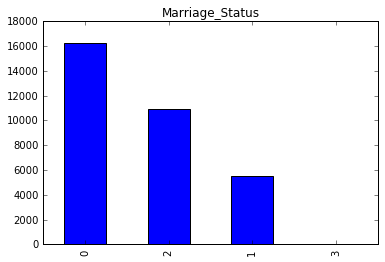

In [31]:
data.M_Status.value_counts().plot(kind='bar',title='Marriage_Status')

### ----------------------EDA of Service--------------------

In [32]:
data.Service.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Service, dtype: int64

In [33]:
data[data.Service.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


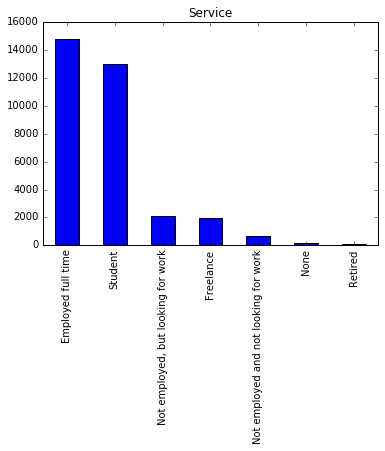

In [34]:
data.Service.value_counts().plot(kind='bar',title='Service')

### ----------------------EDA of M_Ser--------------------

In [35]:
data.M_Ser.value_counts()

No      30526
Yes      2223
none        5
Name: M_Ser, dtype: int64

In [36]:
data[data.M_Ser.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


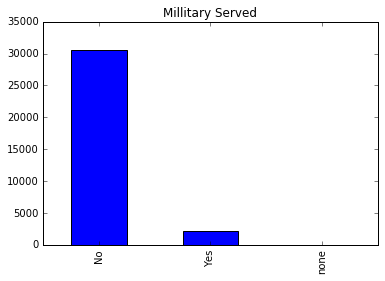

In [37]:
data.M_Ser.value_counts().plot(kind='bar',title='Millitary Served')

### ----------------------EDA of Childrenn under 18 (Chd18)--------------------

In [38]:
data.Chd18.value_counts()

No      27488
Yes      5047
None      219
Name: Chd18, dtype: int64

In [39]:
data[data.Chd18.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


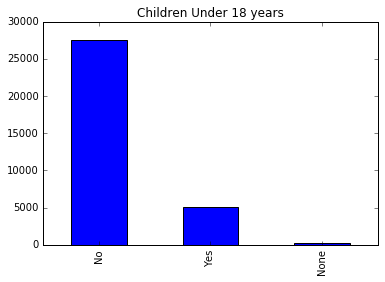

In [40]:
data.Chd18.value_counts().plot(kind='bar',title='Children Under 18 years')

### ----------------------EDA of Education--------------------

In [41]:
data.Education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education, dtype: int64

In [42]:
data[data.Education.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


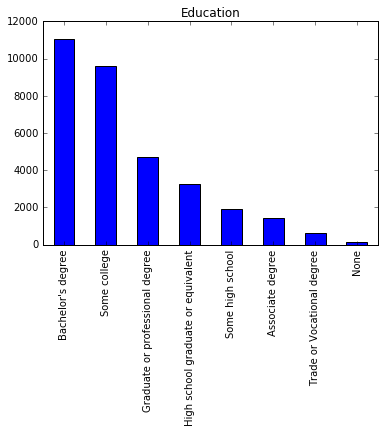

In [43]:
data.Education.value_counts().plot(kind='bar',title='Education')

### ----------------------EDA of Country--------------------

In [44]:
data.Country.shape

(32754,)

In [45]:
udata=data.Country.unique()

In [46]:
udata

array(['United States', 'Germany', 'Romania', 'United Kingdom',
       'Republic of Ireland', 'France', 'Canada', 'Greece', 'Norway',
       'canada', 'Sweden', 'Switzerland', 'romania', 'Australia', 'Israel',
       'Netherlands', 'Bulgaria', 'Spain', 'Belgium', 'Poland', 'Finland',
       'the Netherlands', 'Republic of Ireland ', 'Brazil', 'Denmark',
       'United states of America. ', 'Ireland', 'Bosnia and Herzegovina',
       'Italy', 'Slovenia', 'The Netherlands', 'United Sates', 'Mexico',
       'India', 'Kuwait ', 'Canada ', 'united states of america', 'Chile',
       'FRANCE', 'United Arab Emirates', 'none', 'England', 'Iceland',
       'United Kingdom ', 'Costa Rica', 'Croatia', 'New Zealand',
       'Scotland', 'Barbados', 'Malaysia',
       'United States of America (Washington, DC)', 'South Africa',
       'Portugal', 'india', 'Pakistan', 'BELGIUM', 'colombia',
       'United States of America', 'Indonesia', 'united kingdom',
       'M\xcc\xa9xico', 'Malta', 'france', 'J

In [47]:
Asia=['Bangladesh','Bhutan','Iran','Maldives','Nepal','Pakistan','Sri Lanka','Brunei Darussalam','Cambodia','Indonesia',
      'Thailand',"Lao People's Democratic Republic",'Malaysia','Myanmar','Philippines','Singapore',
      'Timor-Leste','Viet Nam','China','Macao',"Democratic People's Republic of Korea",'Mongolia',
      'Republic of Korea','Kazakhstan','Kyrgyzstan','Tajikistan','Turkmenistan','Uzbekistan',
      'Russia','Palestine', 'Taiwan','India','thailand','Korea, South','Japan','Hong','Brunei',
      'Russian Federation','United Arab Emarites','South Korea','SINGAPORE!','singapore','Hong Kong',
      'Vietnam','Kingdom of Saudi Arabia','SV','Hong Kong ','Brunei Darussalem','Kuwait ''Iran','Armenia','Azerbaijan','Bahrain',
      'Cyprus','Georgia','Iraq','Israel','Jordan','INDIA','india','North Korea','kuwait','Hong Kong, China','Republic Of Korea (American Citizen)','Singapore ',"People's Republic of China",
      'South Korea ','philippines','china','malaysia','Hong KOng','Hong Kong Special Administrative Region, China', 'ISRAEL',
      'PHIILIPPINES','TURKEY','israel', 'Lebanon ','Republic of Macedonia','Iraq, Kurdistan','india','MALAYSIA','Indiia',
      'israel', 'Lebanon ','Japan ','lebanon','turkey','taiwan','JAPAN','SIngapore',"People's Republic of China",'japan',
      'Kuwait','Lebanon','Occupied Palestinian Territory','Oman','Qatar','Saudi Arabia','Syrian Arab Republic','Turkey','United Arab Emirates','Yemen','Afghanistan']
Europe=['spain', 'germany','new zealand','Equestria','England, United Kingdom','Germany ','Republic of Moldova','the netherland',          'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova',
        'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
        'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania','Grand Duchy of Baden','United Kingdown','Faroe Islands',
        'Portugal','Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
        'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',  'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
        'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
        'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom','United kingom','Belgrium', 'slovenia','united kingdom / scotland', 'London United Kingdom',
        'United Kingdom of Great Britain','uk','Czech republic', 'u.k', 'United  Kingdom', 
        'United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK','U.K','United ',
        'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
        'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND']
Australia=['Austrailia','Ozstralia','Australia','australia','austria','Australia','australia','Australi',
           'Austraila','AUSTRALIA','Austrailia','Ozstralia','Australi','Australia','Austria', 'australia','austria',
           'AUSTRALIA', 'Austrailia', 'Austraila','Ozstralia','Australi', 'Fiji','Papua New Guinea', 'New Zealand','new zealand', 'Solomon Islands',
           'Vanuatu', 'Samoa', 'vanuatu', 'samoa', 'Kiribati', 'kiribati' , 'Tonga','tonga', 'Palau','palau', 'Federated States of Micronesia', 'Marshall Islands', 
           'marshall islands','Tuvalu','tuvalu','Nauru', 'nauru'] 
Africa=['Algeria','Egypt','Libyan Arab Jamahiriya','Equatorial Guinea','Gabon','Sao Tome and Principe','Botswana','Lesotho','Namibia','South Africa','Swaziland',
        'kenya','Morocco','Tunisia','Western Sahara','Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mayotte','Zimbabwe',
        'Mozambique','Réunion','Rwanda','Somalia','Sudan','Uganda','United Republic of Tanzania','Zambia',
        'Angola','Cameroon','Central African Republic','Chad','Congo','Democratic Republic of the Congo','Niger','Nigeria','Senegal',
        'Sierra Leone','Togo','Jamaica', 'Dominican Republic','south africa','Aruba','Tanzania',
        'Benin','Burkina Faso','Cape Verde',"Côte d'Ivoire",'Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania']
SouthAmerica=['Brasil','Brasl','brazil','chile','Chile','Uruguay ','venezuela','Argentina','Bolivia','colombia','Venezuela','ecuador','Brazilf',
              'Brazil','Colombia','Ecuador','French Guiana','Guyana','Suriname','argentina','Uruguay','Paraguay','Peru']

Antarctica=['Antarctica','antarctica']

NorthAmerica=['United States','United states of America', 'United States of ','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
              'Republic of the Marshall Islands','united states of America ','Amurika',
              'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
              'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
              'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
              'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
              "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
              'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
              'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
              'Canada (currently Korea)','Canada','CANADA','Norway',
              'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
              'United States of America (DC)','Trinidad & Tobago',
              'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
              'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
              'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
              'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO',
              'United States of America: Guam. No option for territories :(','United states',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
              'Nicaragua','MEXICO','USA',' Canada eh', 'United States of America: Guam']

SouthAmerica=['Brasil','Brasl','brazil','chile','Chile','Uruguay ','venezuela','Argentina','Bolivia','colombia','Venezuela','ecuador','Brazilf',
              'Brazil','Colombia','Ecuador','French Guiana','Guyana','Suriname','argentina','Uruguay','Paraguay','Peru']


       




In [48]:
Continent = []
dump=[]
# For each row in the column,
for i in data['Country']:
    x=''
    try:
        x=transformations.cn_to_ctn(i)
        Continent.append[x]
    except:
        if(i in Europe):
            x="Europe"
            Continent.append(x)
        elif(i in NorthAmerica):
            x="North America"
            Continent.append(x)
        elif(i in SouthAmerica):
            x="South America"
            Continent.append(x)
        elif(i in Africa): 
            x="Africa"
            Continent.append(x)
        elif(i in Asia):
            x="Asia"
            Continent.append(x)

        elif(i in Antarctica):
            x="Antarctica"
            Continent.append(x)
        elif(i in Australia):
            x="Australia"
            Continent.append(x)
        else:
            x="None"
            Continent.append(x) 
            dump.append(i)

In [49]:
Continent

['North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'N

In [50]:
data

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data[data.Country.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


In [48]:
ACdata=data.groupby('Country')

In [49]:
ACdata.Country.value_counts()

Country                           Country                         
 Canada                            Canada                                4
 Canada eh                         Canada eh                             1
 United Kingdom                    United Kingdom                        2
/                                 /                                      1
AUSTRALIA                         AUSTRALIA                              2
Afghanistan                       Afghanistan                            3
Albania                           Albania                                2
Algeria                           Algeria                                1
Amerikka                          Amerikka                               1
Amurika                           Amurika                                1
Andorra                           Andorra                                1
Antarctica                        Antarctica                             2
Antigua and Barbuda              

In [50]:
ACdata.Country.describe()

Country                                 
 Canada                           count                                    4
                                  unique                                   1
                                  top                                 Canada
                                  freq                                     4
 Canada eh                        count                                    1
                                  unique                                   1
                                  top                              Canada eh
                                  freq                                     1
 United Kingdom                   count                                    2
                                  unique                                   1
                                  top                         United Kingdom
                                  freq                                     2
/                                 c

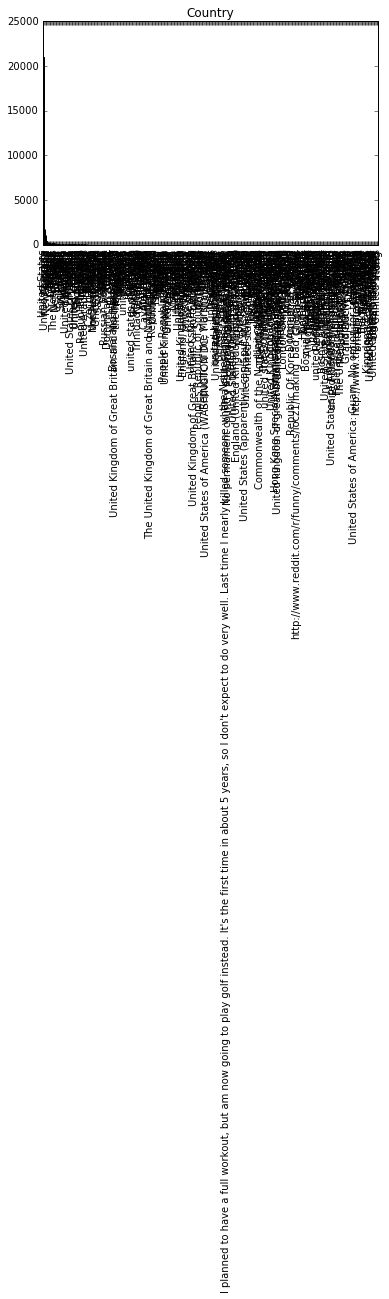

In [51]:
data.Country.value_counts().plot(kind='bar',title='Country')

### ----------------------EDA of US_State--------------------

In [52]:
data.US_State.value_counts()

California        3401
Texas             1541
New York          1418
Illinois           976
Washington         910
Florida            882
Pennsylvania       823
Massachusetts      796
Virginia           729
Ohio               654
New Jersey         552
Michigan           545
North Carolina     511
Maryland           508
Georgia            501
Oregon             466
Minnesota          464
Wisconsin          415
Colorado           410
Arizona            364
Missouri           340
Indiana            313
Connecticut        303
Tennessee          292
Louisiana          196
Utah               181
Kansas             174
Iowa               170
South Carolina     169
Kentucky           168
Alabama            166
Oklahoma           150
Nebraska           118
New Hampshire      111
Nevada             110
Arkansas            99
Washington, DC      98
Maine               85
New Mexico          83
Idaho               78
Alaska              75
Vermont             74
Rhode Island        72
Hawaii     

In [53]:
data[data.US_State.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Male,24,0,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
17,18,Male,44,0,Not employed and not looking for work,No,No,Graduate or professional degree,United Kingdom,NaN,"Under $20,000",aww,I like cats.,Goat,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Male,34,0,Employed full time,No,No,Graduate or professional degree,Republic of Ireland,NaN,"$40,000 - $49,999",askscience,I like cats.,Feta,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Male,54,1,Freelance,No,Yes,High school graduate or equivalent,France,NaN,"Under $20,000",motorcycles,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
21,22,Male,18,0,Student,No,Yes,High school graduate or equivalent,United Kingdom,NaN,"$100,000 - $149,999",anarchism,I like turtles.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
22,23,Male,24,0,Employed full time,No,No,High school graduate or equivalent,Germany,NaN,"$100,000 - $149,999",truereddit,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
23,24,Male,64,0,Employed full time,Yes,No,Trade or Vocational degree,Canada,NaN,"$40,000 - $49,999",atheism,I like cats.,Feta,NaN,NaN,NaN,NaN,NaN,NaN
24,25,Male,54,1,Freelance,No,No,Some college,Germany,NaN,"$150,000 or more",new,I like turtles.,Other,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data.US_State.describe()

count          20846
unique            52
top       California
freq            3401
Name: US_State, dtype: object

In [55]:
##Will replace null value by Missing
data.US_State = data.US_State.fillna(value='Missing')

In [56]:
data[data.US_State.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


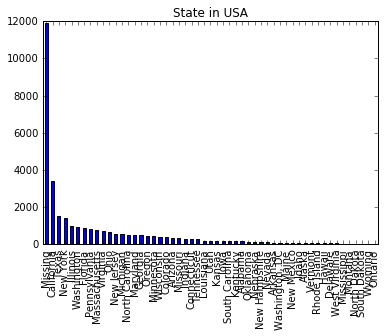

In [57]:
data.US_State.value_counts().plot(kind='bar',title='State in USA')

### ----------------------EDA of R_Income--------------------

In [58]:
data.R_Income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: R_Income, dtype: int64

In [59]:
data[data.R_Income.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


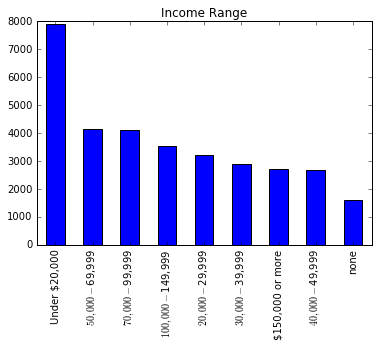

In [60]:
data.R_Income.value_counts().plot(kind='bar',title='Income Range')

### ----------------------EDA of Reddit--------------------

In [61]:
data.Reddit.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [62]:
data[data.Reddit.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Male,24,0,Student,No,No,Some college,Romania,Missing,"Under $20,000",NaN,I like cats.,Swiss,NaN,NaN,NaN,NaN,NaN,NaN
29,30,Female,24,0,Student,No,No,Some college,United States,Minnesota,none,NaN,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
52,53,Male,34,0,"Not employed, but looking for work",No,No,Bachelor's degree,United States,Texas,"$70,000 - $99,999",NaN,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
61,62,Male,34,0,Employed full time,Yes,No,Some college,romania,Missing,"$20,000 - $29,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
75,76,Male,44,0,Freelance,No,No,Some college,United Kingdom,Missing,"$70,000 - $99,999",NaN,I like cats.,Other,NaN,NaN,NaN,NaN,NaN,NaN
79,80,Male,34,0,Employed full time,No,No,Bachelor's degree,United States,Texas,"$40,000 - $49,999",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN
89,90,Male,24,0,Student,No,No,Some college,United States,Colorado,"$150,000 or more",NaN,I like cats.,Brie,NaN,NaN,NaN,NaN,NaN,NaN
103,104,Male,34,2,Student,No,No,Bachelor's degree,United States,Massachusetts,"$20,000 - $29,999",NaN,I like dogs.,Goat,NaN,NaN,NaN,NaN,NaN,NaN
162,163,Female,34,0,Student,No,No,Bachelor's degree,United States,Florida,"Under $20,000",NaN,I like turtles.,Goat,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data.Reddit.describe()

count         28419
unique         1833
top       askreddit
freq           2123
Name: Reddit, dtype: object

In [64]:
data.Reddit = data.Reddit.fillna(value='Missing')

In [65]:
data[data.Reddit.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


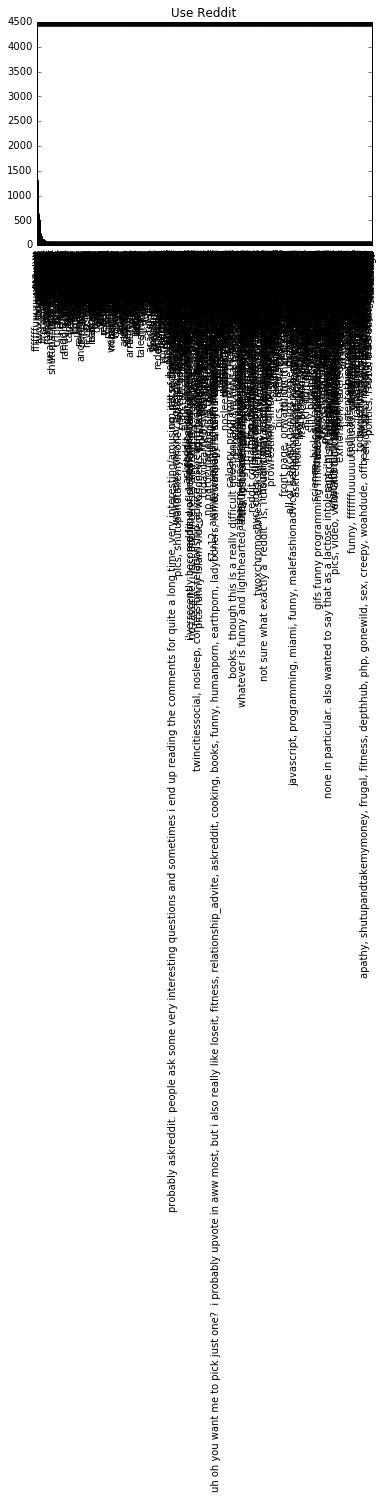

In [66]:
data.Reddit.value_counts().plot(kind='bar',title='Use Reddit')

### ----------------------EDA of Pet--------------------

In [67]:
data.Pet.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: Pet, dtype: int64

In [68]:
data[data.Pet.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
2705,2706,Male,24,0,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,Missing,none,DROP TABLE `users`,NaN,1,7/13/11 15:47,public,NaN,NaN,NaN,NaN
30331,30334,Male,34,2,Employed full time,No,No,Bachelor's degree,Canada,Missing,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming'),7/14/11 12:12,public,NaN,NaN,NaN,NaN


In [69]:
data.Pet.describe()

count            32752
unique               7
top       I like dogs.
freq             17149
Name: Pet, dtype: object

In [70]:
data.Pet =data.Pet.fillna(value='Missing')

In [71]:
data[data.Pet.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


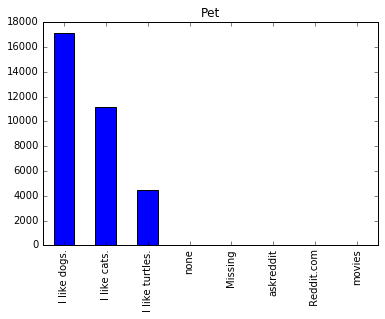

In [72]:
data.Pet.value_counts().plot(kind='bar',title='Pet')

### ----------------------EDA of Cheese--------------------

In [73]:
data.Cheese.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheese, dtype: int64

In [74]:
data['Cheese']=data['Cheese'].str.replace('none','Cheddar')
data['Cheese']=data['Cheese'].str.replace('f7u12','Cheddar')
data['Cheese']=data['Cheese'].str.replace('1','Cheddar')
data['Cheese']=data['Cheese'].str.replace('awww','Cheddar')
data['Cheese']=data['Cheese'].str.replace('Pics','Cheddar')

In [75]:
data[data.Cheese.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


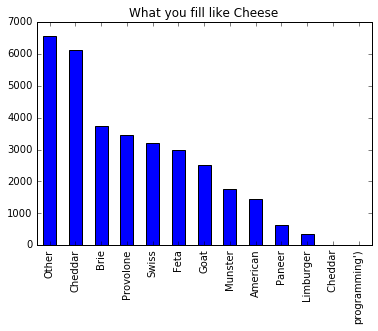

In [76]:
data.Cheese.value_counts().plot(kind='bar',title='What you fill like Cheese')

### ----------------------EDA of U_14--------------------

In [77]:
data.U_14.value_counts()

7/13/11 15:47    1
7/14/11 12:12    1
 pics            1
Name: U_14, dtype: int64

In [78]:
data.U_14.shape

(32754,)

In [79]:
data[data.U_14.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data.U_14.describe()

count                 3
unique                3
top       7/13/11 15:47
freq                  1
Name: U_14, dtype: object

In [81]:
data.U_14 =data.U_14.fillna(value='Missing')

In [82]:
data[data.U_14.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


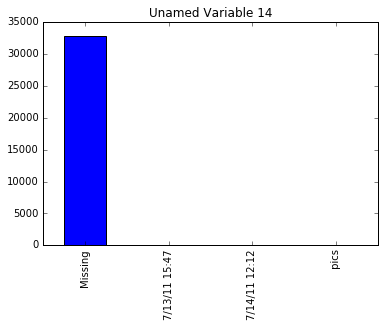

In [83]:
data.U_14.value_counts().plot(kind='bar',title='Unamed Variable 14')

### ----------------------EDA of U_15--------------------

In [84]:
data.U_15.value_counts()

public    2
          1
Name: U_15, dtype: int64

In [85]:
data[data.U_15.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,Missing,NaN,NaN,NaN,NaN,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,Missing,NaN,NaN,NaN,NaN,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,Missing,NaN,NaN,NaN,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,Missing,NaN,NaN,NaN,NaN,NaN


In [86]:
data.U_15.describe()

count          3
unique         2
top       public
freq           2
Name: U_15, dtype: object

In [87]:
data.U_15 =data.U_15.fillna(value='Missing')

In [88]:
data[data.U_15.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


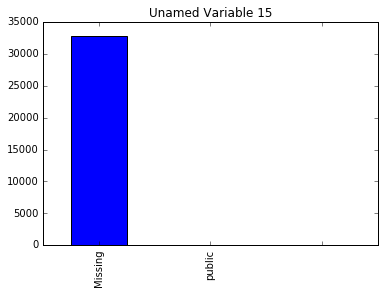

In [89]:
data.U_15.value_counts().plot(kind='bar',title='Unamed Variable 15')

### ----------------------EDA of U_16--------------------

In [90]:
data.U_16.value_counts()

I like cats.    1
Name: U_16, dtype: int64

In [91]:
data[data.U_16.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,Missing,Missing,NaN,NaN,NaN,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,Missing,Missing,NaN,NaN,NaN,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,Missing,Missing,NaN,NaN,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,Missing,Missing,NaN,NaN,NaN,NaN


In [92]:
data.U_16.describe()

count                1
unique               1
top       I like cats.
freq                 1
Name: U_16, dtype: object

In [93]:
data.U_16 =data.U_16.fillna(value='Missing')

In [94]:
data[data.U_16.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


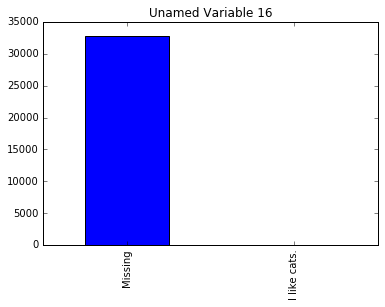

In [95]:
data.U_16.value_counts().plot(kind='bar',title='Unamed Variable 16')

### ----------------------EDA of U_17--------------------

In [96]:
data.U_17.value_counts()

Other    1
Name: U_17, dtype: int64

In [97]:
data[data.U_17.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,Missing,Missing,Missing,NaN,NaN,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,Missing,Missing,Missing,NaN,NaN,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,Missing,Missing,Missing,NaN,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,Missing,Missing,Missing,NaN,NaN,NaN


In [98]:
data.U_17.describe()

count         1
unique        1
top       Other
freq          1
Name: U_17, dtype: object

In [99]:
data.U_17 =data.U_17.fillna(value='Missing')

In [100]:
data[data.U_17.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


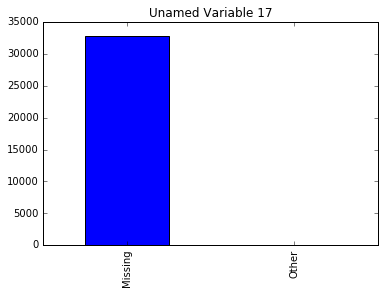

In [101]:
data.U_17.value_counts().plot(kind='bar',title='Unamed Variable 17')

### ----------------------EDA of U_18--------------------

In [102]:
data.U_18.value_counts()

7/14/11 13:22    1
Name: U_18, dtype: int64

In [103]:
data[data.U_18.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,Missing,Missing,Missing,Missing,NaN,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,Missing,Missing,Missing,Missing,NaN,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,Missing,Missing,Missing,Missing,NaN,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,Missing,Missing,Missing,Missing,NaN,NaN


In [104]:
data.U_18.describe()

count                 1
unique                1
top       7/14/11 13:22
freq                  1
Name: U_18, dtype: object

In [105]:
data.U_18 =data.U_18.fillna(value='Missing')

In [106]:
data[data.U_18.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


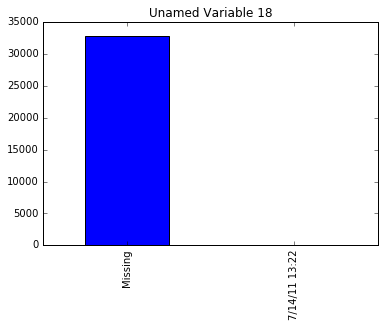

In [107]:
data.U_18.value_counts().plot(kind='bar',title='Unamed Variable 18')

### ----------------------EDA of U_19--------------------

In [108]:
data.U_19.value_counts()

public    1
Name: U_19, dtype: int64

In [109]:
data[data.U_19.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,Missing,Missing,Missing,Missing,Missing,NaN
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,Missing,Missing,Missing,Missing,Missing,NaN
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,Missing,Missing,Missing,Missing,Missing,NaN
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,Missing,Missing,Missing,Missing,Missing,NaN


In [110]:
data.U_19.describe()

count          1
unique         1
top       public
freq           1
Name: U_19, dtype: object

In [111]:
data.U_19 =data.U_19.fillna(value='Missing')

In [112]:
data[data.U_19.isnull()]

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19


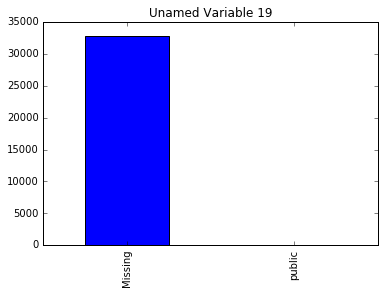

In [113]:
data.U_19.value_counts().plot(kind='bar',title='Unamed Variable 19')

In [114]:
data

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,US_State,R_Income,Reddit,Pet,Cheese,U_14,U_15,U_16,U_17,U_18,U_19
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
2,3,Female,24,1,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,Missing,none,python,I like dogs.,Cheddar,Missing,Missing,Missing,Missing,Missing,Missing
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,Missing,Missing,Missing,Missing,Missing,Missing
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,Missing,Missing,Missing,Missing,Missing,Missing
9,10,Male,34,2,Freelance,No,No,Some college,Germany,Missing,"$70,000 - $99,999",Missing,I like cats.,Munster,Missing,Missing,Missing,Missing,Missing,Missing


## -------------------------As EDA and Data Handelling is done---------------------
### -------Will apply first part of assignment------------------------
<li>Aggregate all Countries to their Continents.
<li>Drop US States
<li>Look for and handle missing values
<li>Create indicator variables for categoricals, bin where you feel appropriate
<li>Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”
<li>Visualize the distributions of cleaned variables

In [115]:
#Drop US State as well as non required unnamed columns from data
del data['US_State']
del data['U_14']
del data['U_15']
del data['U_16']
del data['U_17']
del data['U_18']
del data['U_19']


In [116]:
data.columns

Index([u'EntryId', u'Sex', u'R_Age', u'M_Status', u'Service', u'M_Ser',
       u'Chd18', u'Education', u'Country', u'R_Income', u'Reddit', u'Pet',
       u'Cheese'],
      dtype='object')

In [117]:
data

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,R_Income,Reddit,Pet,Cheese
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,Cheddar
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,Cheddar
2,3,Female,24,1,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,Cheddar
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,Cheddar
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,Cheddar
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,34,2,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",Missing,I like cats.,Munster


#### Look for and handle missing values
#### Handled missing values at the time of EDA for each column 

In [118]:
#Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”

In [119]:
data[data.Pet=='movies']

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,R_Income,Reddit,Pet,Cheese
11169,11170,Male,24,2,Freelance,No,No,Bachelor's degree,United States,"$50,000 - $69,999",f7u12,movies,Cheddar


In [120]:
data['Pet']=data['Pet'].str.replace('movies','I like dogs.')
data['Pet']=data['Pet'].str.replace('askreddit','I like dogs.')
data['Pet']=data['Pet'].str.replace('Reddit.com','I like dogs.')

In [121]:
data[data.Pet=='movies']

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,R_Income,Reddit,Pet,Cheese


In [122]:
data

,EntryId,Sex,R_Age,M_Status,Service,M_Ser,Chd18,Education,Country,R_Income,Reddit,Pet,Cheese
0,1,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",getmotivated,none,Cheddar
1,2,Male,34,1,Employed full time,none,No,Bachelor's degree,United States,"$150,000 or more",gaming,none,Cheddar
2,3,Female,24,1,Freelance,none,No,Some college,United States,"Under $20,000",snackexchange,none,Cheddar
3,4,Male,34,1,Freelance,none,No,Bachelor's degree,United States,"$150,000 or more",spacedicks,none,Cheddar
4,5,Female,34,1,Employed full time,none,No,Bachelor's degree,United States,"$70,000 - $99,999",aww,none,Cheddar
5,6,Male,34,1,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,34,2,Employed full time,No,No,Some college,Germany,none,python,I like dogs.,Cheddar
7,8,Male,24,1,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,44,1,Employed full time,No,No,Bachelor's degree,United States,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,34,2,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",Missing,I like cats.,Munster


### Data Distribution visulization after cleaning-----


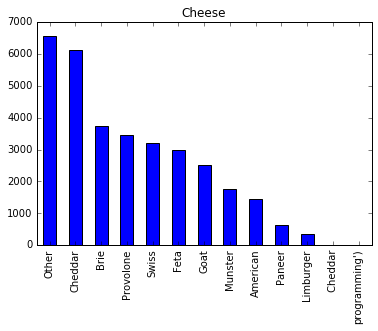

In [123]:
data.Cheese.value_counts().plot(kind='bar',title='Cheese')

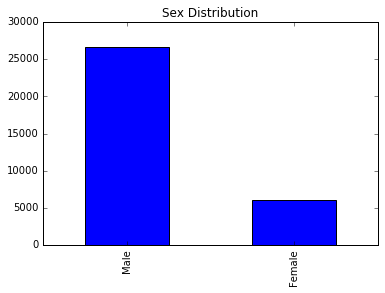

In [124]:
data.Sex.value_counts().plot(kind='bar',title='Sex Distribution')


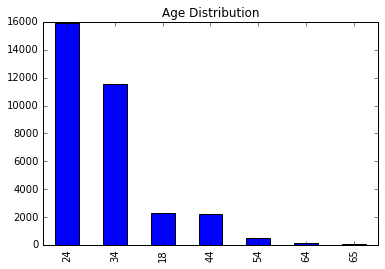

In [125]:
data.R_Age.value_counts().plot(kind='bar',title='Age Distribution')


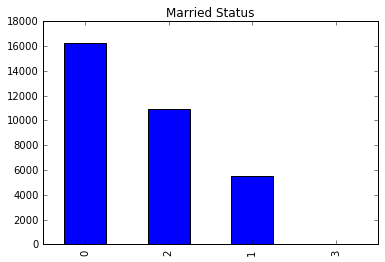

In [126]:
data.M_Status.value_counts().plot(kind='bar',title='Married Status')


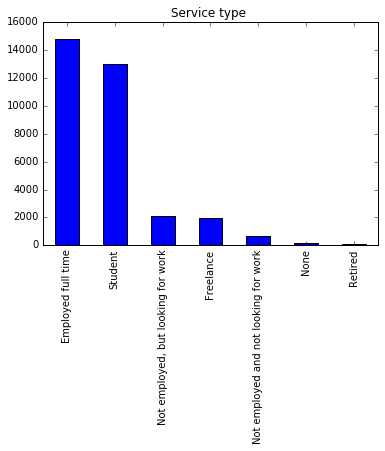

In [127]:
data.Service.value_counts().plot(kind='bar',title='Service type ')


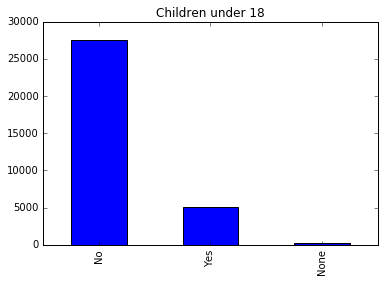

In [128]:
data.Chd18.value_counts().plot(kind='bar',title='Children under 18')


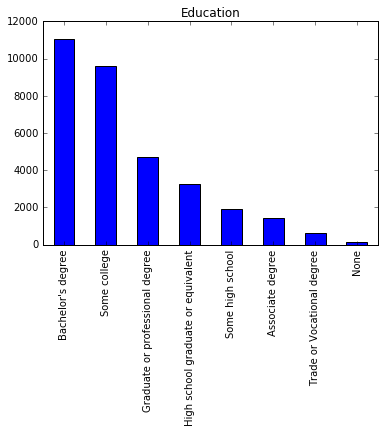

In [129]:
data.Education.value_counts().plot(kind='bar',title='Education')


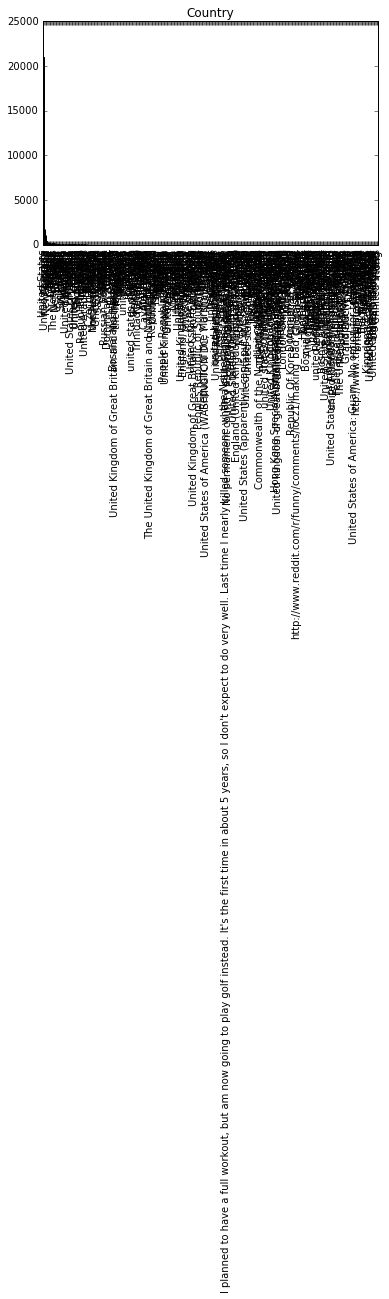

In [130]:
data.Country.value_counts().plot(kind='bar',title='Country')

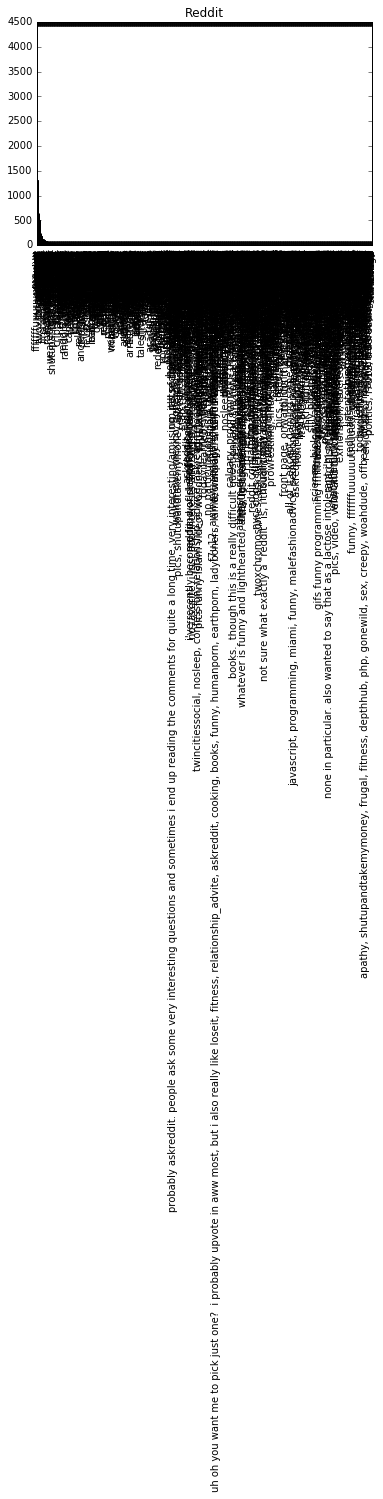

In [131]:
data.Reddit.value_counts().plot(kind='bar',title='Reddit')

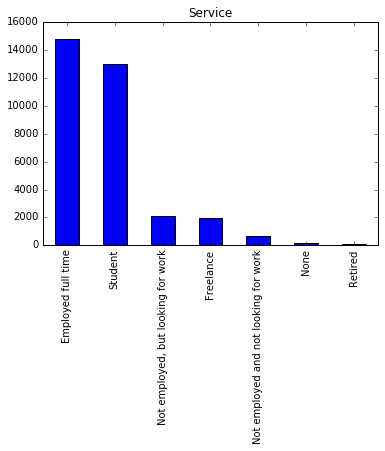

In [132]:
data.Service.value_counts().plot(kind='bar',title='Service')

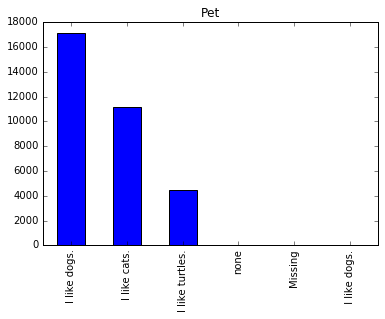

In [133]:
data.Pet.value_counts().plot(kind='bar',title='Pet')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c6643d0>]], dtype=object)

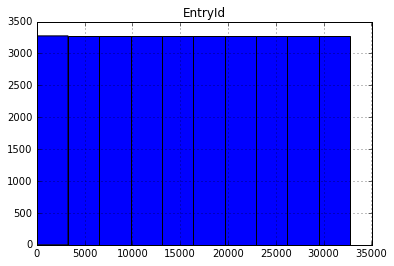

In [134]:
data.hist()

### In this step will drop non -required columns from dataframe

M_Ser,Reddit,Pet,Cheese,Service

In [135]:
del data['Chd18']
del data['M_Ser']
del data['Reddit']
del data['Pet']
del data['Cheese']
del data['Service']
del data['Education']
del data['Country']
del data['R_Income']

### Create indicator variables for categoricals, bin where you feel appropriate

In [136]:
def describe_categorical(data):
    from IPython.display import display, HTML
    display(HTML(data[data.columns[data.dtypes == "object"]].describe().to_html()))

In [137]:
describe_categorical(data)

,Sex,R_Age,M_Status
count,32754,32754,32754
unique,2,7,4
top,Male,24,0
freq,26619,15890,16278


In [138]:
categorical_variables = ['Sex', 'R_Age','M_Status']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    data[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(data[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    data = pd.concat([data, dummies], axis=1)
    data.drop([variable], axis=1, inplace=True)

In [139]:
def printall(data, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(data.to_html(max_rows=max_rows)))
    
printall(data)

,EntryId,Sex_Female,Sex_Male,R_Age_18,R_Age_24,R_Age_34,R_Age_44,R_Age_54,R_Age_64,R_Age_65,M_Status_0,M_Status_1,M_Status_2,M_Status_3
0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,32752,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32750,32753,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32751,32754,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32752,32755,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### -------------------------Second Part of Assignment---------------------------------

2. Use Pearson's Correlation Coefficient, determine which variables are most highly collinear, and graph the results. (hint: http://stanford.edu/~mwaskom/ software/seaborn/examples/ many_pairwise_correlations. html) 

In [140]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

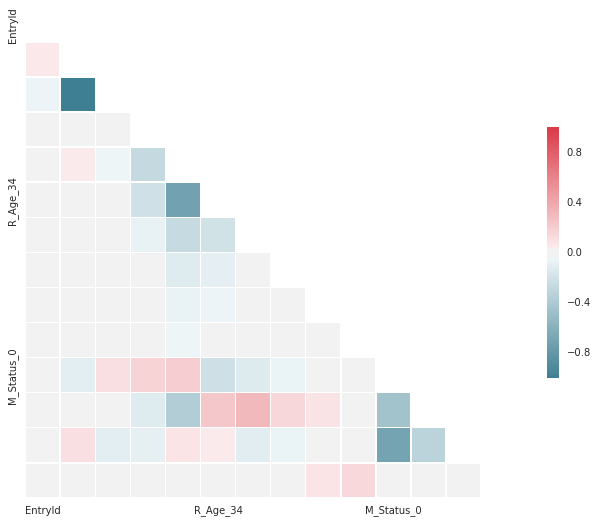

In [141]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Part Three -----------------------Random Forest-----------------------

Create a random forest model that predicts YOUR dependent variable based on the remaining variables.  If your dependent variable is muti-class (more than just two classes) then I'd like you to use a confusion matrix to measure model performance.  If you'd like, you may also experiment with one-vs-all AUC methods.  (50 pts)
Determining YOUR dependent variable:
If your Last Name Begins with G-K Marital Status

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd


In [143]:
data.describe()

,EntryId,Sex_Female,Sex_Male,R_Age_18,R_Age_24,R_Age_34,R_Age_44,R_Age_54,R_Age_64,R_Age_65,M_Status_0,M_Status_1,M_Status_2,M_Status_3
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,16378.561916,0.187305,0.812695,0.071136,0.485132,0.353392,0.068908,0.015326,0.004274,0.001832,0.496977,0.167766,0.333913,0.001343
std,9456.272427,0.390162,0.390162,0.257056,0.499787,0.478030,0.253301,0.122849,0.065239,0.042761,0.499998,0.373664,0.471616,0.036628
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8189.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16379.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24567.750000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,32756.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
y=data.pop('M_Status_1')

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd

In [146]:
numeric_variables = list(data.dtypes[data.dtypes != "object"].index)
data[numeric_variables].head()

,EntryId,Sex_Female,Sex_Male,R_Age_18,R_Age_24,R_Age_34,R_Age_44,R_Age_54,R_Age_64,R_Age_65,M_Status_0,M_Status_2,M_Status_3
0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(data[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [148]:
model.oob_score_

1.0

In [149]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)

c-stat:  1.0


In [150]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(data, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  1.0


In [151]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(data, y)
model.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.19916159,  0.79152264,  0.00931577])

/Users/rajeshjaiswal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


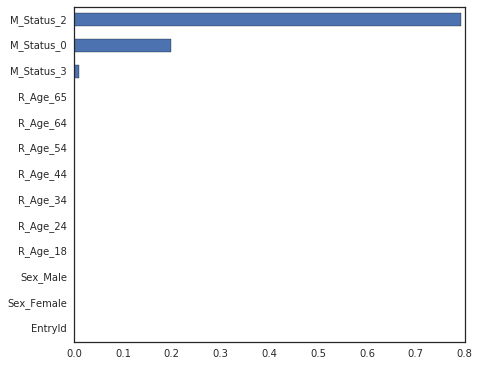

In [152]:
feature_importances = pd.Series(model.feature_importances_, index=data.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

/Users/rajeshjaiswal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


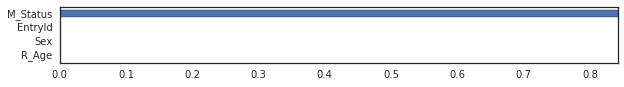

In [153]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, data.columns, summarized_columns=categorical_variables)

In [154]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(data, y)

1 loop, best of 3: 12.4 s per loop


In [155]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(data, y)

1 loop, best of 3: 7.74 s per loop


30 trees
C-stat:  1.0

50 trees
C-stat:  1.0

100 trees
C-stat:  1.0

200 trees
C-stat:  1.0

500 trees
C-stat:  1.0

1000 trees
C-stat:  1.0

2000 trees
C-stat:  1.0



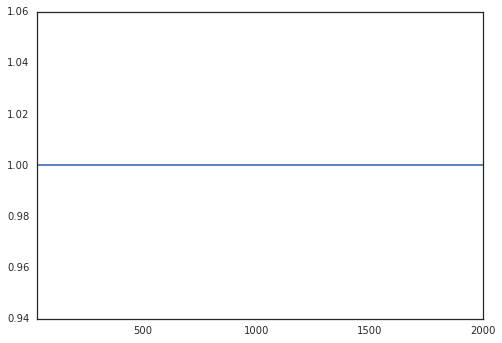

In [156]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(data, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  1.0

None option
C-stat:  1.0

sqrt option
C-stat:  1.0

log2 option
C-stat:  1.0

0.9 option
C-stat:  1.0

0.2 option
C-stat:  1.0



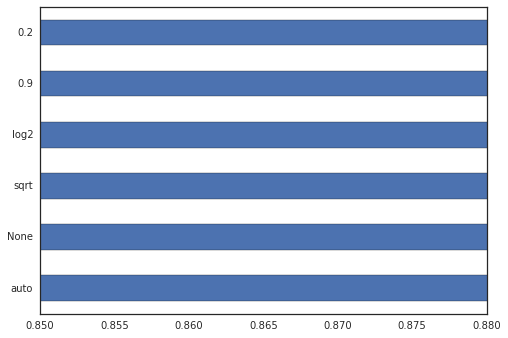

In [157]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(data, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  1.0

2 min samples
C-stat:  1.0

3 min samples
C-stat:  0.999999739632

4 min samples
C-stat:  0.999999672871

5 min samples
C-stat:  0.99999941918

6 min samples
C-stat:  0.999999252278

7 min samples
C-stat:  0.999998865064

8 min samples
C-stat:  0.999998063933

9 min samples
C-stat:  0.999996414938

10 min samples
C-stat:  0.999991614827



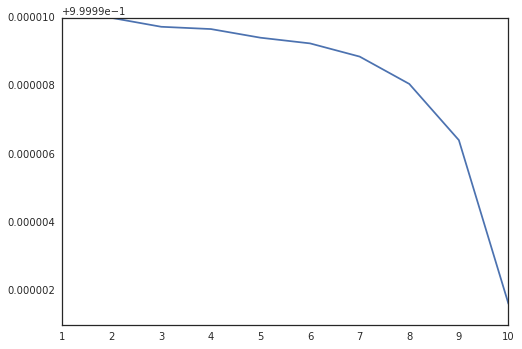

In [158]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="sqrt", 
                                  min_samples_leaf=min_samples)
    model.fit(data, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [159]:
model = RandomForestRegressor(n_estimators=30, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=1)
model.fit(data, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  1.0


### ----------------------------------- Confusion Matrix------------------------------

In [160]:
import numpy as np
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [161]:
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)
# Checking that the classification works correctly.
y_train, y_test = np.random.permutation(y_train), np.random.permutation(y_test)

In [162]:
clfs = [svm.SVC(kernel='linear', C=0.01), RandomForestClassifier()]

In [163]:
for clf in clfs:
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization using {}'.format(str(clf).split('(')[0]))
    print(cm)
    print "Accuracy: ", accuracy_score(y_test, y_pred)

Confusion matrix, without normalization using SVC
[[6657  108]
 [1395   29]]
Accuracy:  0.816461106362
Confusion matrix, without normalization using RandomForestClassifier
[[5902  863]
 [1234  190]]
Accuracy:  0.74392477714


### -------------------------------End of Assignment--------------------------